<a href="https://colab.research.google.com/github/danacioDS/AI-ML-SimpliLearn/blob/master/02_China_Palace_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

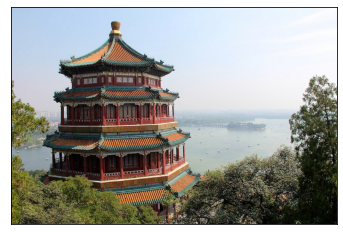

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
# returns the dimension of the array

china.shape

(427, 640, 3)

In [ ]:
# reshape the data to [n_samples x n_samples]; and scale the colors
# so that they lie between 0 and 1 

data = china /255.0 # use 0....1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [ ]:
china.T

array([[[174, 172, 174, ...,  88, 122, 116],
        [174, 173, 174, ..., 147, 129, 104],
        [174, 173, 174, ..., 122, 118, 108],
        ...,
        [250, 251, 252, ...,  39,   9,  43],
        [250, 251, 252, ...,   8,   9,  13],
        [250, 251, 252, ...,   6,  16,  15]],

       [[201, 199, 201, ...,  80, 112, 103],
        [201, 200, 201, ..., 138, 120,  93],
        [201, 200, 201, ..., 116, 112, 102],
        ...,
        [251, 252, 253, ...,  42,  12,  49],
        [251, 252, 253, ...,  14,  15,  21],
        [251, 252, 253, ...,  12,  24,  24]],

       [[231, 229, 231, ...,   7,  41,  35],
        [231, 230, 231, ...,  69,  53,  31],
        [231, 230, 231, ...,  38,  36,  28],
        ...,
        [255, 255, 255, ...,  33,   3,  39],
        [255, 255, 255, ...,   2,   3,   6],
        [255, 255, 255, ...,   0,   9,   7]]], dtype=uint8)

In [ ]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
      colors = data

  # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1,2,  figsize=(16,6))
    ax[0].scatter(R, G, B, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R,B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

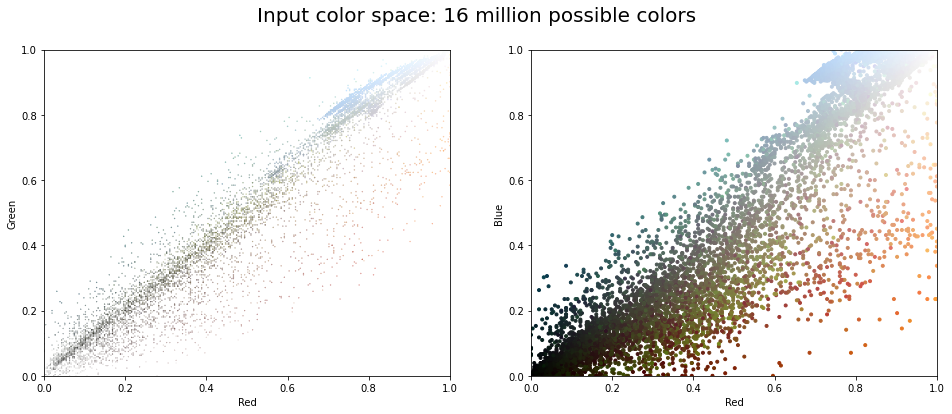

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
import warnings; warnings.simplefilter('ignore') # Numpy Issues

from sklearn import cluster
from sklearn.cluster import MiniBatchKMeans

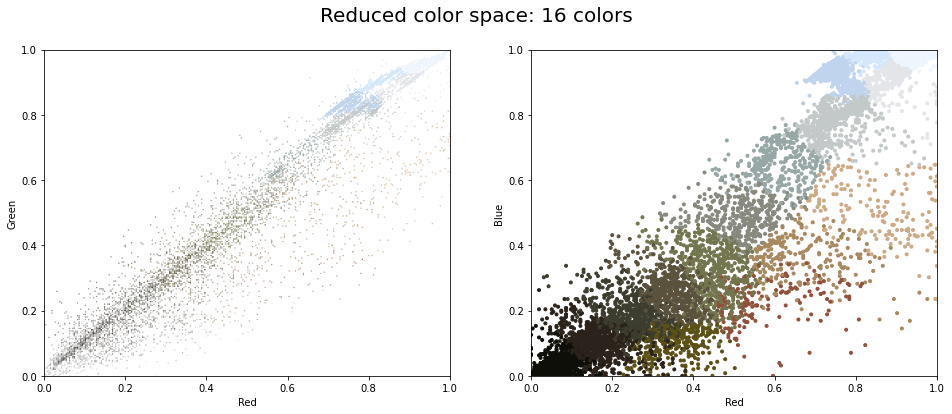

In [ ]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, 
            title='Reduced color space: 16 colors')


Text(0.5, 1.0, '16_color image')

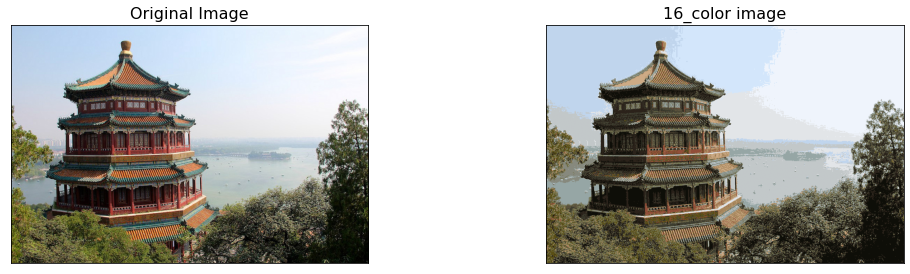

In [ ]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), 
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.5)

ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16_color image', size=16)